In [18]:
import pandas as pd
df0 = pd.read_csv(r"telecom_churn_data.csv") 

df0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [19]:
# Define the important columns (without month suffix)
important_columns = {
    "mobile_number": "mobile_no",
    "total_og_mou": "outgoing_mou",
    "total_ic_mou": "incoming_mou",
    "onnet_mou": "onnet_usage",
    "arpu": "avg_revenue_per_user",
    "aon": "age_on_network",
    "fb_user": "facebook_user",
    "roam_og_mou": "roaming_outgoing_mou",
    "count_rech_3g": "recharge_count_3g",
    "loc_og_t2t_mou": "local_og_same_network_mou",
    "loc_ic_mou": "local_incoming_mou",
    "loc_ic_t2m_mou": "local_incoming_to_mobile_mou",
    "vol_3g_mb": "data_usage_3g_mb",
    "monthly_3g": "monthly_data_plan_3g",
    "max_rech_data": "max_data_recharge_amt",
    "av_rech_amt_data": "avg_data_recharge_amt",
    "arpu_2g": "avg_revenue_2g",
    "arpu_3g": "avg_revenue_3g",
    "std_og_t2t_mou": "std_og_same_network_mou",
    "last_day_rch_amt": "last_day_recharge_amt",
    "std_og_t2m_mou": "std_og_to_mobile_mou",
    "isd_og_mou": "isd_outgoing_mou",
    "loc_og_mou": "local_outgoing_mou",
    "loc_og_t2m_mou": "local_outgoing_to_mobile_mou",
    "total_rech_num": "total_recharge_count",
    "std_og_mou": "std_outgoing_mou",
    "max_rech_amt": "max_recharge_amt",
    "offnet_mou": "off_network_mou",
    "total_og_mou": "total_outgoing_mou",
    "total_rech_amt": "total_recharge_amt"
}

# Define months
months = [6, 7, 8, 9]

# Create a list of full column names to keep
columns_to_keep = ["mobile_number", "aon"]  # These are common across months
for month in months:
    for col in important_columns.keys():
        if col not in ["mobile_number", "aon"]:  # Avoid duplicating non-monthly columns
            columns_to_keep.append(f"{col}_{month}")



In [20]:
df_filtered = df0[columns_to_keep]

In [21]:
# Dictionary to store month-wise DataFrames
dfs = {}

for month in months:
    # Generate column mappings dynamically for the given month
    month_col_mapping = {f"{col}_{month}": new_col for col, new_col in important_columns.items() if col not in ["mobile_number", "aon"]}
    
    # Ensure 'mobile_number' and 'aon' remain consistent across all months
    month_col_mapping["mobile_number"] = "mobile_no"
    month_col_mapping["aon"] = "age_on_network"

    # Select relevant columns and rename them
    dfs[month] = df_filtered[list(month_col_mapping.keys())].rename(columns=month_col_mapping)

# Assign to specific month variables
df_june = dfs[6]
df_july = dfs[7]
df_august = dfs[8]
df_september = dfs[9]

In [22]:
df_june.isnull().sum()

total_outgoing_mou                  0
incoming_mou                        0
onnet_usage                      3937
avg_revenue_per_user                0
facebook_user                   74846
roaming_outgoing_mou             3937
recharge_count_3g               74846
local_og_same_network_mou        3937
local_incoming_mou               3937
local_incoming_to_mobile_mou     3937
data_usage_3g_mb                    0
monthly_data_plan_3g                0
max_data_recharge_amt           74846
avg_data_recharge_amt           74846
avg_revenue_2g                  74846
avg_revenue_3g                  74846
std_og_same_network_mou          3937
last_day_recharge_amt               0
std_og_to_mobile_mou             3937
isd_outgoing_mou                 3937
local_outgoing_mou               3937
local_outgoing_to_mobile_mou     3937
total_recharge_count                0
std_outgoing_mou                 3937
max_recharge_amt                    0
off_network_mou                  3937
total_rechar

In [23]:
def drop_high_nan_columns(df, threshold=0.60):
    """
    Drops columns with more than `threshold`% missing values.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    threshold (float): Percentage threshold (e.g., 0.60 for 60%).

    Returns:
    pd.DataFrame: Cleaned DataFrame with columns dropped.
    """
    initial_cols = set(df.columns)  # Store original columns
    
    # Drop columns where missing values exceed threshold
    df_cleaned = df.dropna(axis=1, thresh=int(threshold * len(df)))
    
    # Identify dropped columns
    dropped_cols = initial_cols - set(df_cleaned.columns)
    print(f"Columns dropped ({len(dropped_cols)}):", dropped_cols)
    
    return df_cleaned


In [24]:
# Set the threshold (e.g., 60% missing values)
threshold = 0.60

df_june = drop_high_nan_columns(df_june, threshold)
df_july = drop_high_nan_columns(df_july, threshold)
df_august = drop_high_nan_columns(df_august, threshold)
df_september = drop_high_nan_columns(df_september, threshold)


Columns dropped (6): {'avg_revenue_2g', 'facebook_user', 'avg_revenue_3g', 'max_data_recharge_amt', 'avg_data_recharge_amt', 'recharge_count_3g'}
Columns dropped (6): {'avg_revenue_2g', 'facebook_user', 'avg_revenue_3g', 'max_data_recharge_amt', 'avg_data_recharge_amt', 'recharge_count_3g'}
Columns dropped (6): {'avg_revenue_2g', 'facebook_user', 'avg_revenue_3g', 'max_data_recharge_amt', 'avg_data_recharge_amt', 'recharge_count_3g'}
Columns dropped (6): {'avg_revenue_2g', 'facebook_user', 'avg_revenue_3g', 'max_data_recharge_amt', 'avg_data_recharge_amt', 'recharge_count_3g'}


In [25]:
df_june.isnull().sum()

total_outgoing_mou                 0
incoming_mou                       0
onnet_usage                     3937
avg_revenue_per_user               0
roaming_outgoing_mou            3937
local_og_same_network_mou       3937
local_incoming_mou              3937
local_incoming_to_mobile_mou    3937
data_usage_3g_mb                   0
monthly_data_plan_3g               0
std_og_same_network_mou         3937
last_day_recharge_amt              0
std_og_to_mobile_mou            3937
isd_outgoing_mou                3937
local_outgoing_mou              3937
local_outgoing_to_mobile_mou    3937
total_recharge_count               0
std_outgoing_mou                3937
max_recharge_amt                   0
off_network_mou                 3937
total_recharge_amt                 0
mobile_no                          0
age_on_network                     0
dtype: int64

In [26]:
import numpy as np

def fill_na_with_median(df):
    """
    Fills NaN values in a DataFrame with the median of each column.
    - Whole numbers stay as integers
    - Decimal numbers are rounded to 3 places

    Args:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    pd.DataFrame: DataFrame with NaNs replaced by median values.
    """
    na_counts = df.isnull().sum().sum()  # Count total NaNs before filling

    for col in df.columns:
        if df[col].dtype in [np.int64, np.int32, 'int']:  # Whole numbers
            median_value = int(df[col].median())  # Keep as integer
        else:  # Float columns
            median_value = round(df[col].median(), 3)  # Round to 3 decimals

        df[col].fillna(median_value, inplace=True)

    print(f"Filled {na_counts} NaN values with median.")
    
    return df


In [27]:
df_june = fill_na_with_median(df_june)
df_july = fill_na_with_median(df_july)
df_august = fill_na_with_median(df_august)
df_september = fill_na_with_median(df_september)
print("Remaining NaN values in df_june:", df_june.isnull().sum().sum())  
print("Remaining NaN values in df_july:", df_july.isnull().sum().sum())  
print("Remaining NaN values in df_august:", df_august.isnull().sum().sum())  
print("Remaining NaN values in df_september:", df_september.isnull().sum().sum())  


Filled 47244 NaN values with median.
Filled 46308 NaN values with median.
Filled 64536 NaN values with median.
Filled 92940 NaN values with median.
Remaining NaN values in df_june: 0
Remaining NaN values in df_july: 0
Remaining NaN values in df_august: 0
Remaining NaN values in df_september: 0


C:\Users\User\AppData\Local\Temp\ipykernel_7752\2945406102.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_7752\2945406102.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_value, inplace=True)


In [28]:
df_june.describe()

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000
mean,305.133424,200.130037,128.534195,282.987358,13.363643,45.715288,164.525246,105.468325,121.396219,0.075921,...,0.766849,141.087324,91.282541,7.558806,162.094979,104.637486,193.934538,327.514615,7.001207e+09,1219.854749
std,463.419481,291.651671,291.921906,328.439770,70.074931,148.015207,249.501742,168.591539,544.247227,0.363371,...,25.253433,247.224843,159.867997,7.078405,383.406921,120.614894,311.179884,398.019701,6.956694e+05,954.733842
min,0.000000,0.000000,0.000000,-2258.709000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09,180.000000
25%,44.740000,38.530000,8.030000,93.411500,0.000000,1.910000,32.440000,18.560000,0.000000,0.000000,...,0.000000,18.610000,10.760000,3.000000,0.000000,30.000000,36.720000,109.000000,7.000606e+09,467.000000
50%,145.140000,114.740000,34.310000,197.704000,0.000000,11.910000,92.160000,56.490000,0.000000,0.000000,...,0.000000,65.110000,41.030000,6.000000,11.640000,110.000000,96.310000,230.000000,7.001205e+09,863.000000
75%,372.860000,251.670000,112.610000,371.060000,0.000000,38.820000,200.580000,127.600000,0.000000,0.000000,...,0.000000,161.920000,105.780000,9.000000,132.490000,120.000000,222.535000,437.500000,7.001812e+09,1807.500000
max,10674.030000,7716.140000,7376.710000,27731.088000,3775.110000,6431.330000,7454.630000,4693.860000,45735.400000,14.000000,...,5900.660000,10643.380000,4729.740000,307.000000,8432.990000,4010.000000,8362.360000,35190.000000,7.002411e+09,4337.000000


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Function to remove outliers based on IQR for AON & ARPU only
def remove_outliers(df):
    cols_to_check = ['age_on_network', 'avg_revenue_per_user']
    
    Q1 = df[cols_to_check].quantile(0.25)
    Q3 = df[cols_to_check].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]

# Function to apply RobustScaler while excluding AON & ARPU
def apply_robust_scaler(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Exclude 'mobile_no', 'age_on_network', and 'avg_revenue_per_user' from scaling
    exclude_cols = ['mobile_no', 'age_on_network', 'avg_revenue_per_user']
    cols_to_scale = [col for col in num_cols if col not in exclude_cols]

    # Apply RobustScaler
    scaler = RobustScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])  

    return df

# **Apply IQR outlier removal for AON & ARPU before transformation**
df_june = remove_outliers(df_june)
df_july = remove_outliers(df_july)
df_august = remove_outliers(df_august)
df_september = remove_outliers(df_september)

# **Apply RobustScaler to all other features**
df_june = apply_robust_scaler(df_june)
df_july = apply_robust_scaler(df_july)
df_august = apply_robust_scaler(df_august)
df_september = apply_robust_scaler(df_september)

# **Fix NaN values in 'onnet_usage' and ensure ARPU has no negatives**
for df in [df_june, df_july, df_august, df_september]:
    df['onnet_usage'].fillna(0, inplace=True)
    df.loc[df['avg_revenue_per_user'] < 0, 'avg_revenue_per_user'] = 0  # Replace negative revenue with 0



C:\Users\User\AppData\Local\Temp\ipykernel_7752\2828422774.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['onnet_usage'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_7752\2828422774.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [30]:
df_september

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
0,-0.398156,-0.521475,0.000000,21.100,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,-0.476190,0.000000,-0.565625,7000842753,968
1,-0.144390,0.462255,-0.146497,86.285,0.00,0.237425,0.569639,0.003417,0.00,0.0,...,0.0,0.087219,0.184965,0.000000,-0.091353,0.000000,-0.226203,-0.187500,7001865778,1006
2,0.041526,2.187078,0.572866,290.714,70.94,0.104963,1.776106,-0.188254,8.42,0.0,...,0.0,0.025223,-0.138471,0.333333,0.104606,0.476190,0.213317,0.553125,7001625959,1103
3,0.877675,1.076118,2.698981,389.500,0.00,0.141851,0.479773,-0.040043,0.00,0.0,...,0.0,0.179958,0.332786,1.500000,2.474473,0.000000,0.177090,0.715625,7001204172,2491
4,-0.030089,0.552603,0.368662,163.426,0.00,1.593561,0.778066,-0.089375,0.00,0.0,...,0.0,0.312272,-0.015540,-0.166667,-0.091353,0.000000,-0.279835,0.059375,7000142493,1526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.302646,0.286424,-0.380127,29.950,0.00,-0.377599,0.439460,0.280619,0.00,0.0,...,0.0,-0.295626,-0.181175,-0.500000,-0.091353,0.000000,-0.405788,-0.409375,7001548952,3199
99995,-0.023684,0.047920,0.250318,140.835,4.23,1.282025,0.111772,0.072931,0.00,0.0,...,0.0,0.319745,0.095894,-0.666667,-0.070715,-0.190476,-0.210214,-0.471875,7000607688,2052
99996,-0.398156,-0.521475,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.000000,0.000000,-0.666667,0.000000,-0.476190,0.000000,-0.565625,7000087541,185
99997,-0.398156,-0.509914,-0.380127,731.010,0.00,-0.377599,-0.625910,-0.580886,4177.14,4.0,...,0.0,-0.525180,-0.494251,0.166667,-0.091353,1.923810,-0.588882,2.128125,7000498689,478


In [31]:
df_august.describe()

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
count,94304.000000,9.430400e+04,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,...,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,9.430400e+04,94304.000000
mean,0.402807,3.885938e-01,0.796907,223.894787,6.581722,0.801804,0.389315,0.403511,103.939803,0.059170,...,0.216926,0.422159,0.421878,0.277208,1.086195,0.308533,0.388777,0.195432,7.001205e+09,1213.862392
std,1.104808,1.370564e+00,2.431510,186.156310,35.114358,3.576773,1.508810,1.535026,399.435062,0.283546,...,3.906197,1.444740,1.335371,1.034625,2.493351,1.029075,1.295361,0.763867,6.966387e+05,949.362585
min,-0.440845,-5.469226e-01,-0.381323,0.000000,0.000000,-0.370792,-0.615824,-0.581238,0.000000,0.000000,...,0.000000,-0.513527,-0.486265,-0.833333,-0.099717,-0.670000,-0.592826,-0.654723,7.000000e+09,180.000000
25%,-0.319833,-3.665956e-01,-0.304169,78.939000,0.000000,-0.317686,-0.394448,-0.385030,0.000000,0.000000,...,0.000000,-0.372273,-0.364217,-0.333333,-0.099717,-0.370000,-0.388612,-0.384365,7.000603e+09,466.000000
50%,0.000000,3.608360e-17,0.000000,177.764500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.001200e+09,859.000000
75%,0.680167,6.334044e-01,0.695831,329.030750,0.000000,0.682314,0.605552,0.614970,0.000000,0.000000,...,0.000000,0.627727,0.635783,0.666667,0.900283,0.630000,0.611388,0.615635,7.001812e+09,1798.000000
max,18.033377,5.445196e+01,61.646782,797.211000,1175.690000,166.022760,70.464542,62.035429,28919.680000,9.000000,...,358.880000,41.901896,29.985904,13.833333,35.701614,43.820000,23.069133,21.162866,7.002411e+09,3788.000000


In [32]:
df_june.columns

Index(['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'mobile_no', 'age_on_network'],
      dtype='object')

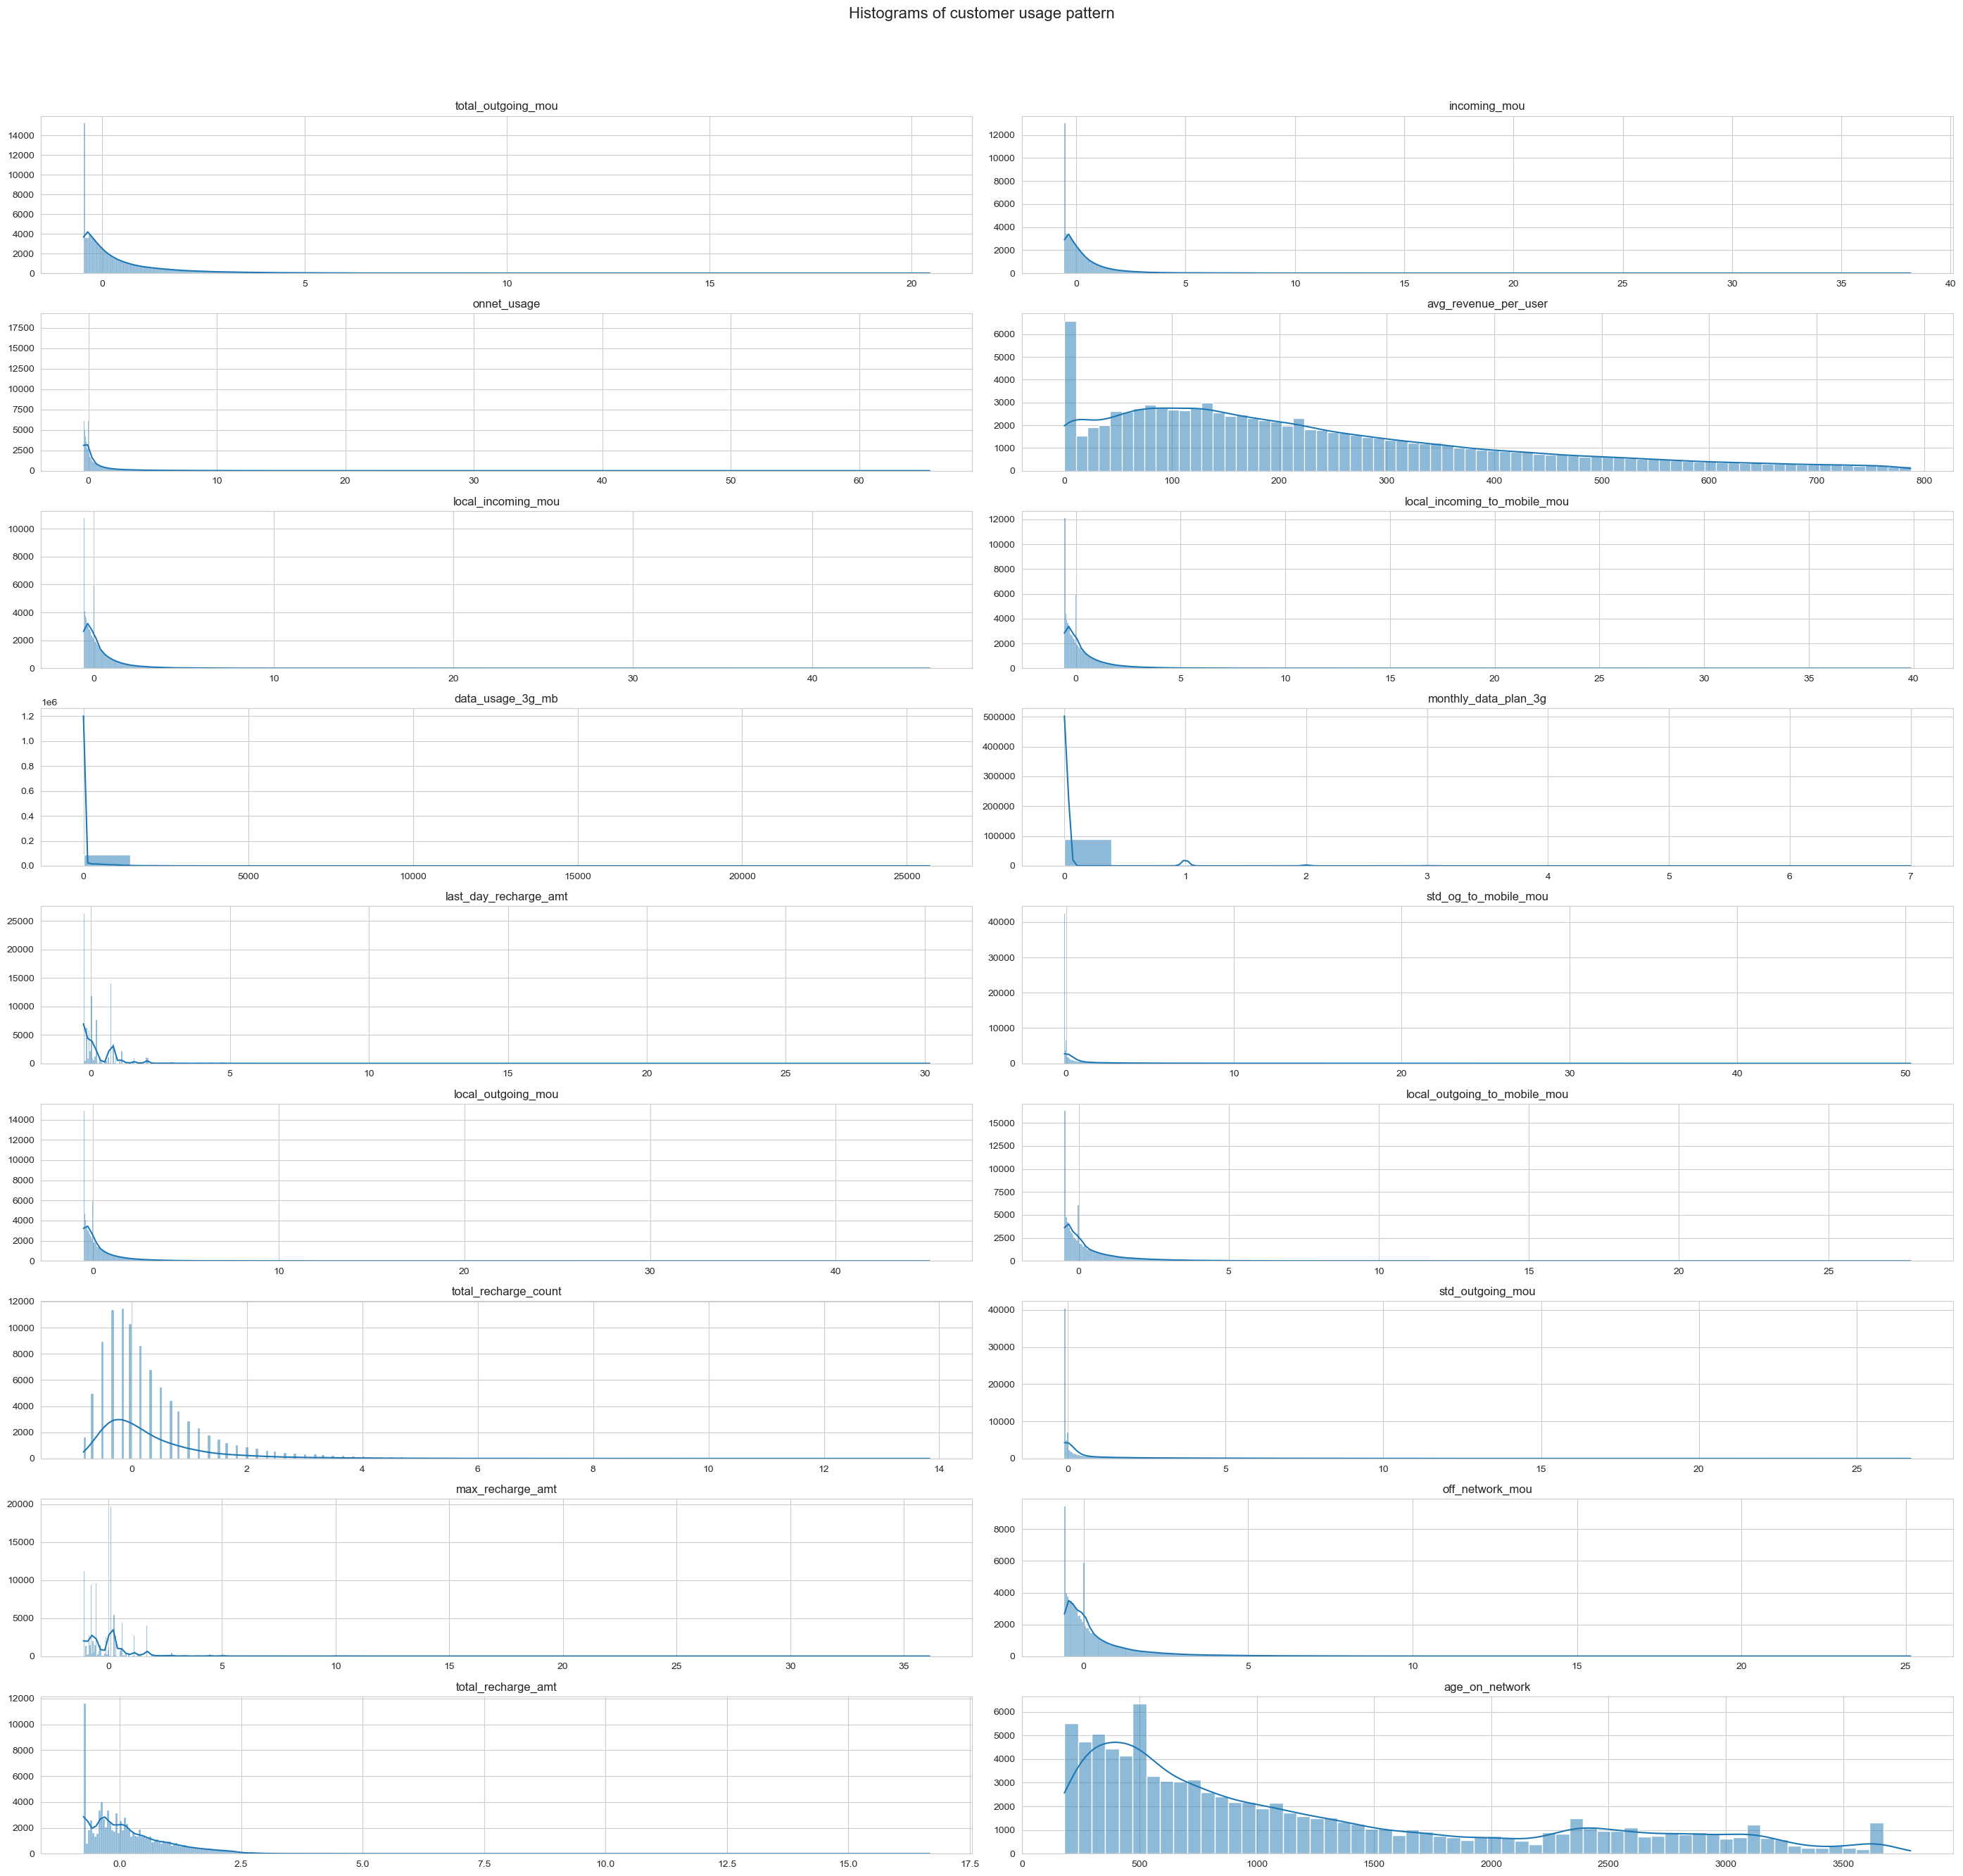

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(28, 28))
fig.suptitle('Histograms of customer usage pattern', fontsize=16)

cols = ['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g',
       'last_day_recharge_amt', 'std_og_to_mobile_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'age_on_network']

for i, col in enumerate(cols):
    sns.histplot(df_june[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

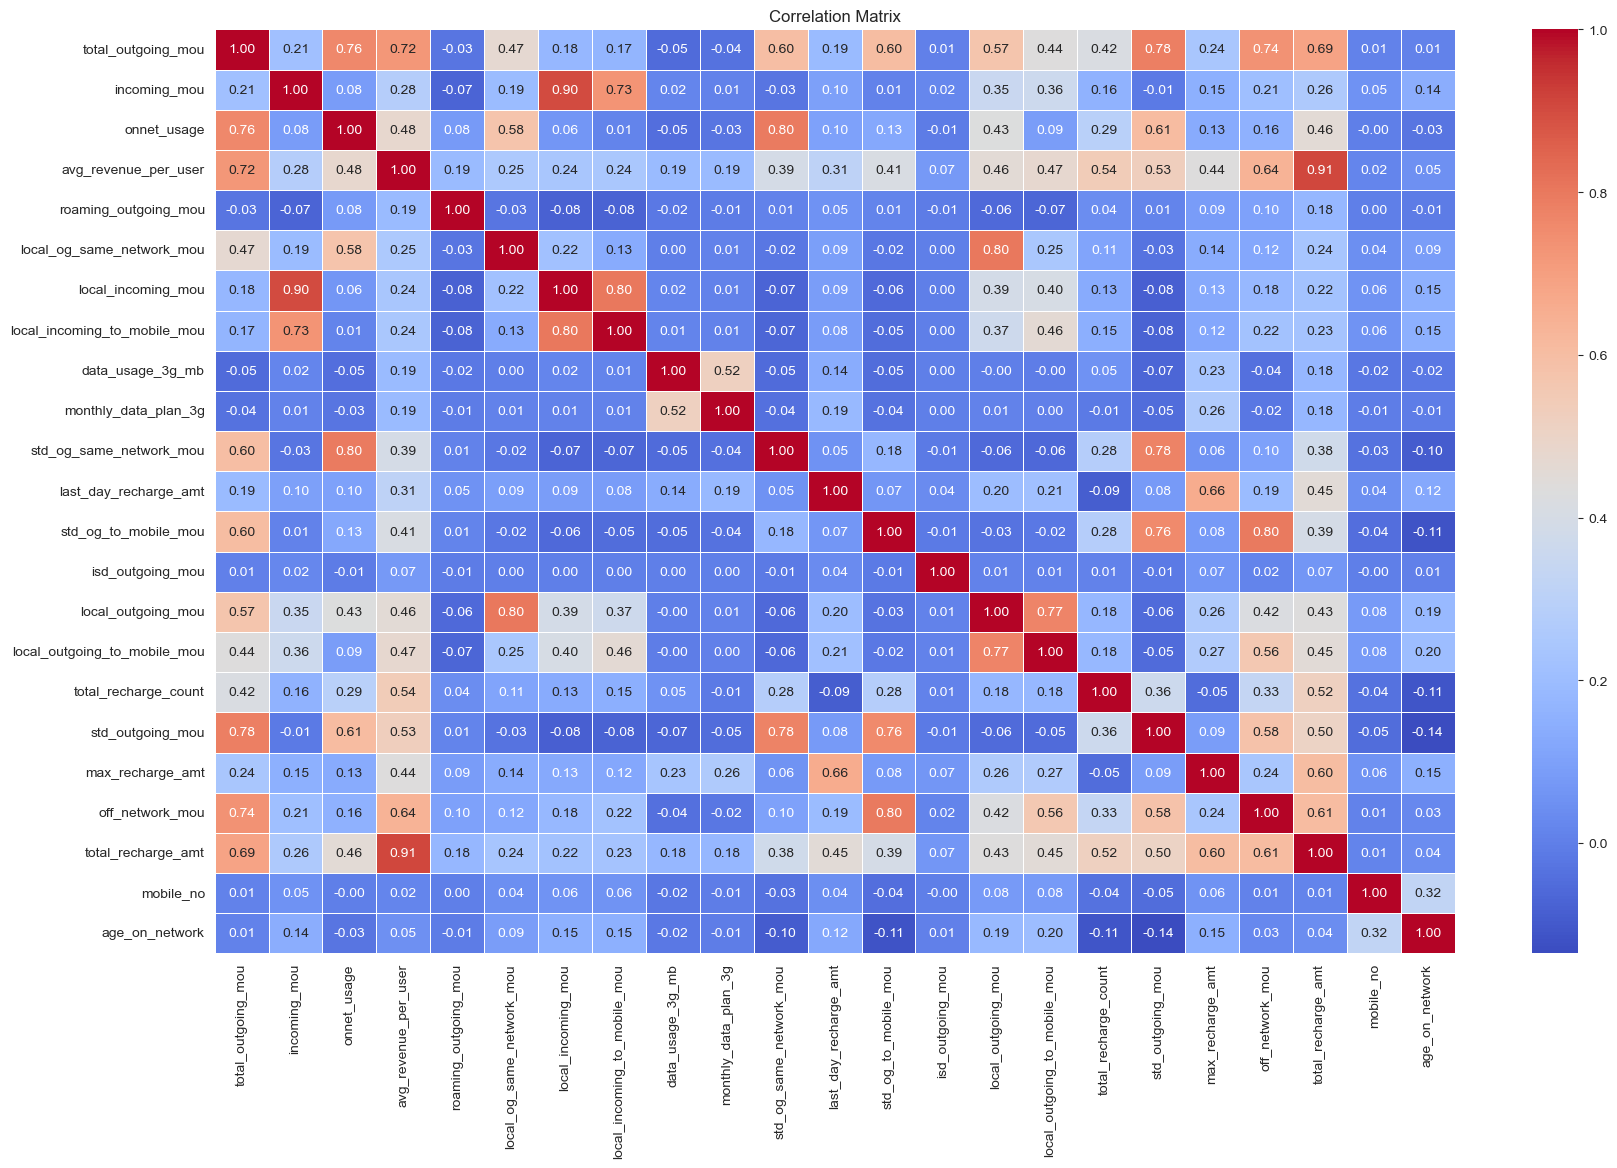

                              total_outgoing_mou  incoming_mou  onnet_usage  \
total_outgoing_mou                      1.000000      0.214431     0.760660   
incoming_mou                            0.214431      1.000000     0.084877   
onnet_usage                             0.760660      0.084877     1.000000   
avg_revenue_per_user                    0.721290      0.278582     0.479888   
roaming_outgoing_mou                   -0.025551     -0.069980     0.077426   
local_og_same_network_mou               0.469479      0.194179     0.576460   
local_incoming_mou                      0.176110      0.899828     0.064613   
local_incoming_to_mobile_mou            0.169544      0.729909     0.014710   
data_usage_3g_mb                       -0.054815      0.017730    -0.045208   
monthly_data_plan_3g                   -0.036223      0.009573    -0.027191   
std_og_same_network_mou                 0.600582     -0.027095     0.795469   
last_day_recharge_amt                   0.189783    

In [34]:
# Correlation matrix
correlation_matrix = df_june.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load & preprocess data
df = df_june.copy()

# Features & Target for ARPU (Avoid future-dependent variables)
arpu_features = ['total_outgoing_mou', 'incoming_mou', 'onnet_usage', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou','off_network_mou']


Performance for ARPU Prediction:
               Model  CV R2 Score        MAE           MSE        RMSE  \
4            XGBoost     0.831596  49.309343   5616.111801   74.940722   
3  Gradient Boosting     0.827299  51.839280   5829.349592   76.350177   
2      Random Forest     0.826011  50.597667   5834.032899   76.380841   
0  Linear Regression     0.767353  60.403507   8268.053211   90.928836   
1      Decision Tree     0.657891  70.137017  11402.522882  106.782596   

   Test R2 Score  
4       0.832437  
3       0.826075  
2       0.825935  
0       0.753313  
1       0.659792  


C:\Users\User\AppData\Local\Temp\ipykernel_17824\3860742539.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arpu_results, x='Model', y='Test R2 Score', palette='viridis')


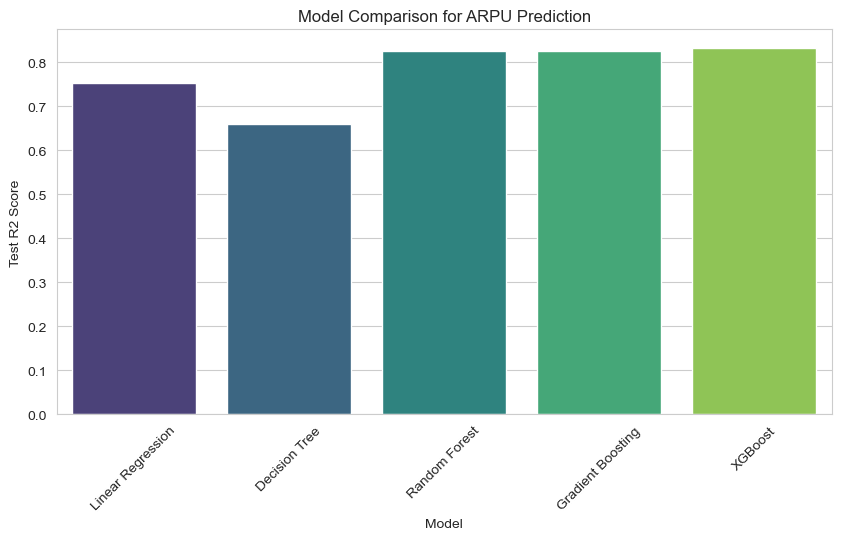

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load & preprocess data
df = df_june.copy()

# Features & Target for ARPU (Avoid future-dependent variables)
arpu_features = ['total_outgoing_mou', 'incoming_mou', 'onnet_usage', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou','off_network_mou']
X_arpu = df[arpu_features]
y_arpu = df['avg_revenue_per_user']

# Train-Test Split (80-20)
X_arpu_train, X_arpu_test, y_arpu_train, y_arpu_test = train_test_split(X_arpu, y_arpu, test_size=0.2, random_state=42)

# Define Models
arpu_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Cross-validation & Model Evaluation
def evaluate_models_cv(models, X_train, y_train, X_test, y_test, target_name):
    results = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Cross-validation score
        cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2').mean()

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append([name, cv_r2, mae, mse, rmse, r2])

    results_df = pd.DataFrame(results, columns=['Model', 'CV R2 Score', 'MAE', 'MSE', 'RMSE', 'Test R2 Score'])
    print(f"\nPerformance for {target_name} Prediction:")
    print(results_df.sort_values(by='Test R2 Score', ascending=False))
    return results_df

# Evaluate ARPU Models
arpu_results = evaluate_models_cv(arpu_models, X_arpu_train, y_arpu_train, X_arpu_test, y_arpu_test, "ARPU")

# Plot Model Comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=arpu_results, x='Model', y='Test R2 Score', palette='viridis')
plt.title('Model Comparison for ARPU Prediction')
plt.xticks(rotation=45)
plt.show()


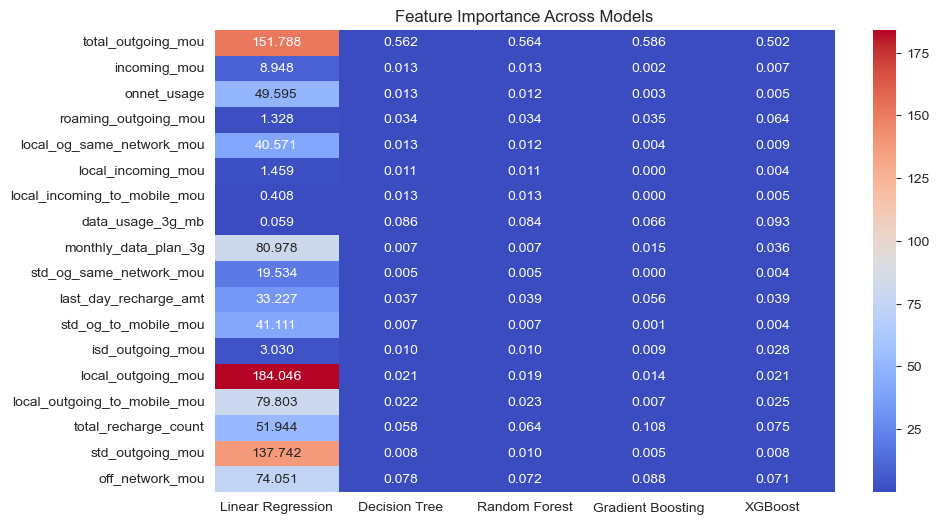

C:\Users\User\AppData\Local\Temp\ipykernel_17824\2904095790.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_importance_df, x="Importance", y="Feature", palette="viridis")


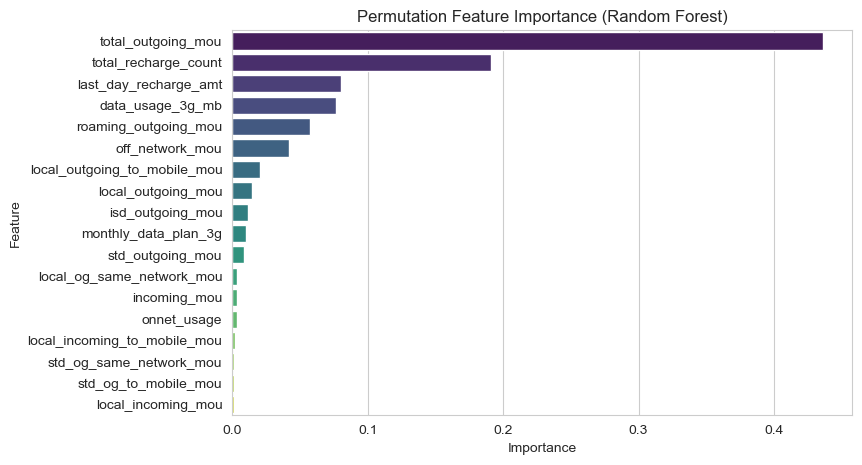

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.inspection import permutation_importance

# Define models again for feature importance extraction
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Train models on CLV prediction
feature_importances = {}

for name, model in models.items():
    model.fit(X_arpu_train, y_arpu_train)
    
    # Extract feature importance
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:  # For linear regression
        importance = np.abs(model.coef_)
    
    feature_importances[name] = importance

# Convert to DataFrame
feature_importance_df = pd.DataFrame(feature_importances, index=X_arpu_train.columns)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Importance Across Models")
plt.show()

# Permutation Importance (for more robustness)
perm_importance = permutation_importance(models["Random Forest"], X_arpu_test, y_arpu_test, scoring='r2')
perm_importance_df = pd.DataFrame({'Feature': X_arpu_train.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(8, 5))
sns.barplot(data=perm_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Permutation Feature Importance (Random Forest)")
plt.show()


In [37]:
import joblib
# Define features
features = arpu_features

# Function to train, evaluate, and save models
def train_and_save_models(df, month):
    X = df[features]
    y_arpu = df["avg_revenue_per_user"]

    # Split into training & test sets (80% train, 20% test)
    X_train, X_test, y_arpu_train, y_arpu_test = train_test_split(X, y_arpu, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "RandomForest_ARPU": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost_ARPU": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    # Train models
    models["RandomForest_ARPU"].fit(X_train, y_arpu_train)
    models["XGBoost_ARPU"].fit(X_train, y_arpu_train)

    # Evaluate models
    for name, model in models.items():
        y_test = y_arpu_test
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"\n Performance of {name} for {month}:")
        print(f"   - MAE: {mae:.3f}")
        print(f"   - RMSE: {rmse:.3f}")
        print(f"   - R2 Score: {r2:.3f}")

    # Save models
    for name, model in models.items():
        joblib.dump(model, f"{name}_{month}.pkl")

    print(f"\n Models for {month} trained, evaluated, and saved!\n")

# Train, evaluate, and save models for each month
for month, df in zip(["june"], [df_june]):
    train_and_save_models(df, month)



 Performance of RandomForest_ARPU for june:
   - MAE: 50.598
   - RMSE: 76.381
   - R2 Score: 0.826

 Performance of XGBoost_ARPU for june:
   - MAE: 48.964
   - RMSE: 73.871
   - R2 Score: 0.837

 Models for june trained, evaluated, and saved!



In [38]:
import joblib
import pandas as pd

# Define a function to load models and predict
def predict_from_models(df, month):
    X = df[features]
    mobile_numbers = df["mobile_no"]  # Keep track of customers

    # Load trained models
    rf_arpu = joblib.load(f"RandomForest_ARPU_{month}.pkl")
    gb_arpu = joblib.load(f"XGBoost_ARPU_{month}.pkl")

    # Make predictions
    predictions_df = pd.DataFrame({
        "mobile_no": mobile_numbers,
        "ARPU_RF_Prediction": rf_arpu.predict(X),
        "ARPU_XG_Prediction": gb_arpu.predict(X)
    })

    return predictions_df

# Predict for July, August, and September
df_july_predictions = predict_from_models(df_july, "june")  # Using June model to predict July
df_august_predictions = predict_from_models(df_august, "june")  # Using June model to predict August
df_september_predictions = predict_from_models(df_september, "june")  # Using june model to predict September

# Merge all predictions on mobile number
final_predictions_df = (
    df_july_predictions
    .merge(df_august_predictions, on="mobile_no", suffixes=("_july", "_august"))
    .merge(df_september_predictions, on="mobile_no", suffixes=("", "_september"))
)

# Display final predictions
print(final_predictions_df.head())


    mobile_no  ARPU_RF_Prediction_july  ARPU_XG_Prediction_july  \
0  7000842753                257.94528               258.991699   
1  7001865778                266.51516               193.268005   
2  7001625959                340.88445               325.731415   
3  7001204172                283.29783               288.975769   
4  7000142493                233.03232               239.544144   

   ARPU_RF_Prediction_august  ARPU_XG_Prediction_august  ARPU_RF_Prediction  \
0                  238.09041                 214.882797           82.185415   
1                  332.86283                 331.641144          112.358670   
2                  215.58187                 227.213989          360.247240   
3                  379.95560                 377.586212          413.751430   
4                  203.06618                 199.029221          164.639840   

   ARPU_XG_Prediction  
0           96.553810  
1          110.435654  
2          316.639374  
3          406.573303  
4 

In [42]:
df_july.columns

Index(['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'mobile_no', 'age_on_network'],
      dtype='object')

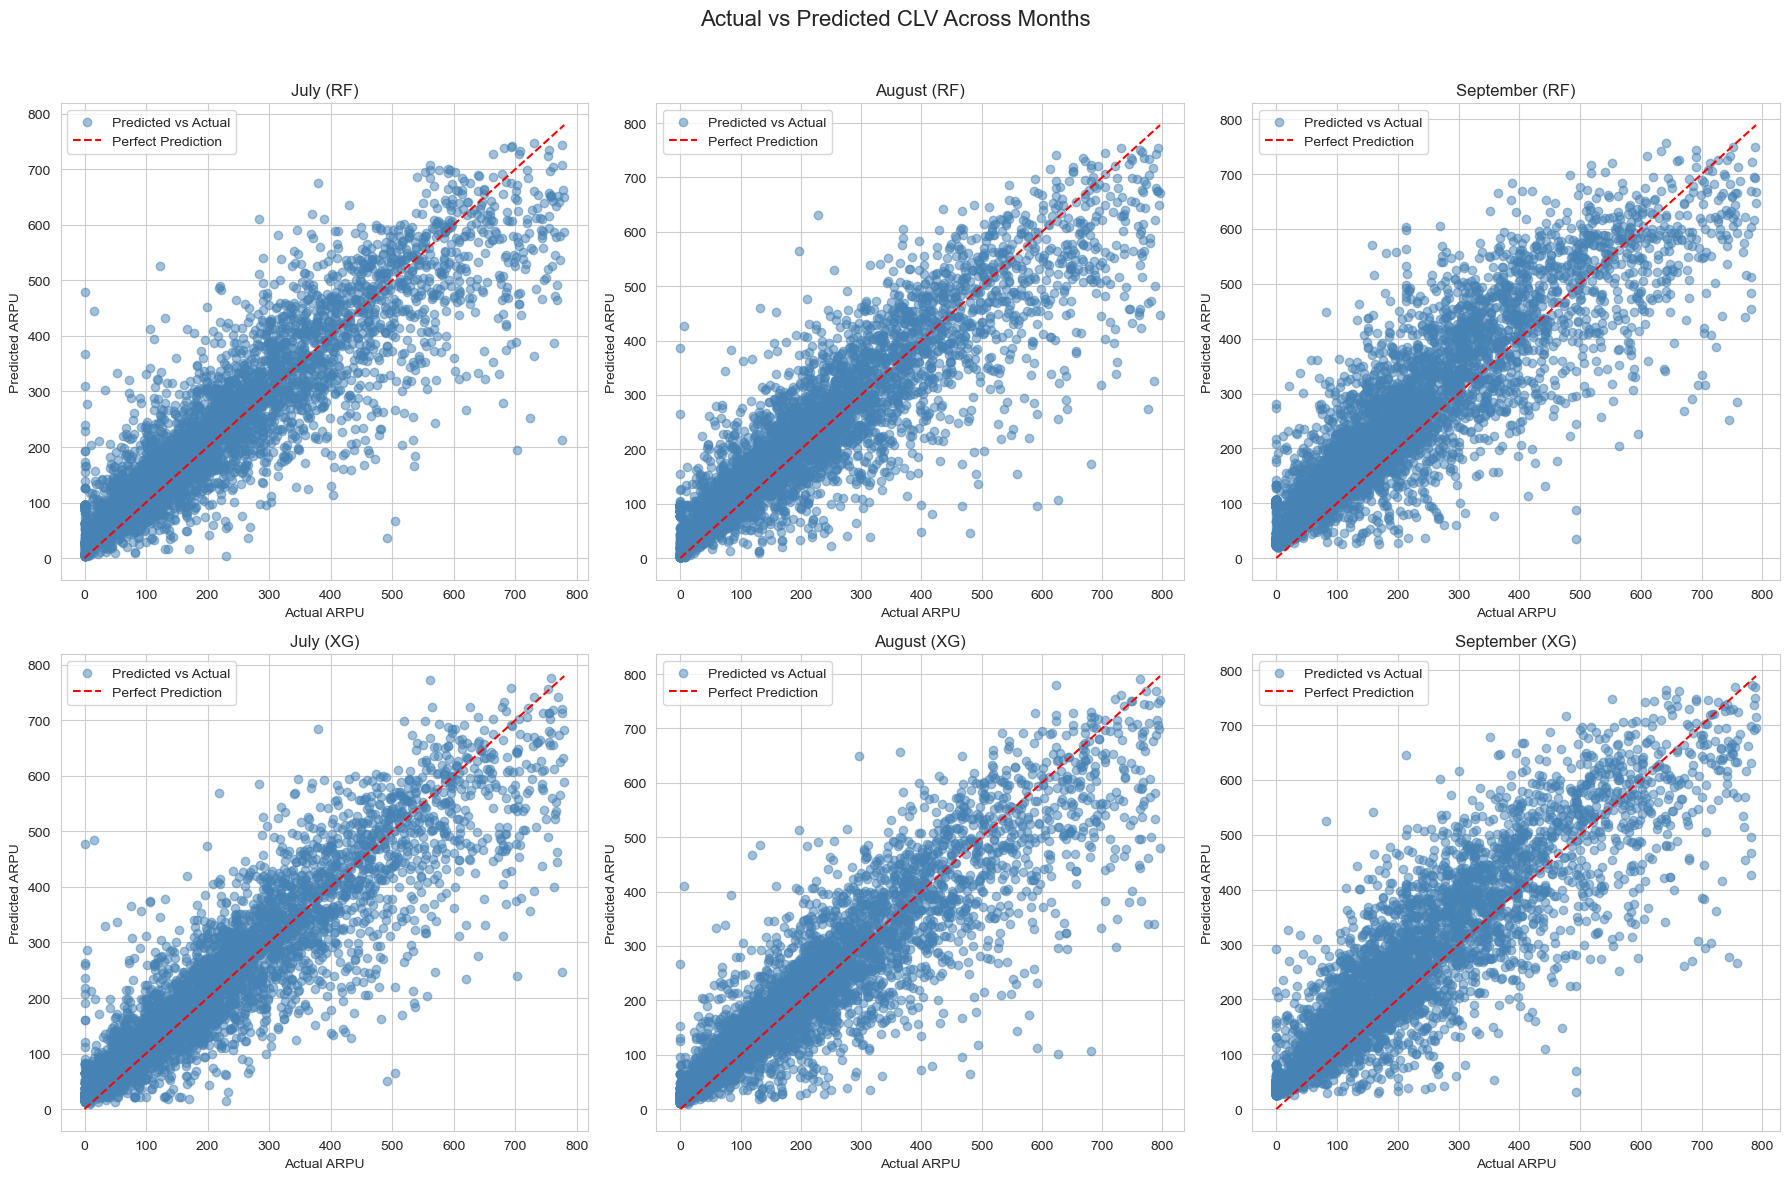

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Define sample fraction (e.g., 30% of the data for better visualization)
sample_frac = 0.05

# Define function to plot Actual vs. Predicted values
def plot_actual_vs_predicted(actual_df, predicted_df, month, ax, model_type):
    """
    Plots Actual vs Predicted CLV using scatter plot with sampling.

    Parameters:
    - actual_df: DataFrame containing actual values
    - predicted_df: DataFrame containing predictions
    - month: Month name as string (e.g., "July")
    - ax: Matplotlib axis for plotting
    - model_type: "RF" for Random Forest, "GB" for Gradient Boosting
    """

    actual_values = actual_df[ 'avg_revenue_per_user']
    predicted_values = predicted_df[f"ARPU_{model_type}_Prediction"]

    # Apply Sampling
    sampled_indices = actual_df.sample(frac=sample_frac, random_state=42).index
    actual_values = actual_values.loc[sampled_indices]
    predicted_values = predicted_values.loc[sampled_indices]

    # Scatter Plot
    ax.scatter(actual_values, predicted_values, alpha=0.5, color="steelblue", label="Predicted vs Actual")
    
    # Perfect Prediction Line
    ax.plot([min(actual_values), max(actual_values)], 
            [min(actual_values), max(actual_values)], color='red', linestyle='--', label="Perfect Prediction")
    
    ax.set_title(f"{month.capitalize()} ({model_type})", fontsize=12)
    ax.set_xlabel("Actual ARPU", fontsize=10)
    ax.set_ylabel("Predicted ARPU", fontsize=10)
    ax.legend()
    ax.grid(True)

# Create a 2x3 grid for scatter plots (2 models x 3 months)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Actual vs Predicted CLV Across Months", fontsize=16)

# Define months and corresponding actual vs. predicted DataFrames
months = ["july", "august", "september"]
actual_dfs = [df_july, df_august, df_september]
predicted_dfs = [df_july_predictions, df_august_predictions, df_september_predictions]

# Loop through months and plot for both models
for i, (month, actual_df, predicted_df) in enumerate(zip(months, actual_dfs, predicted_dfs)):
    plot_actual_vs_predicted(actual_df, predicted_df, month, axes[0, i], "RF")  # Random Forest
    plot_actual_vs_predicted(actual_df, predicted_df, month, axes[1, i], "XG")  # XGBoost

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


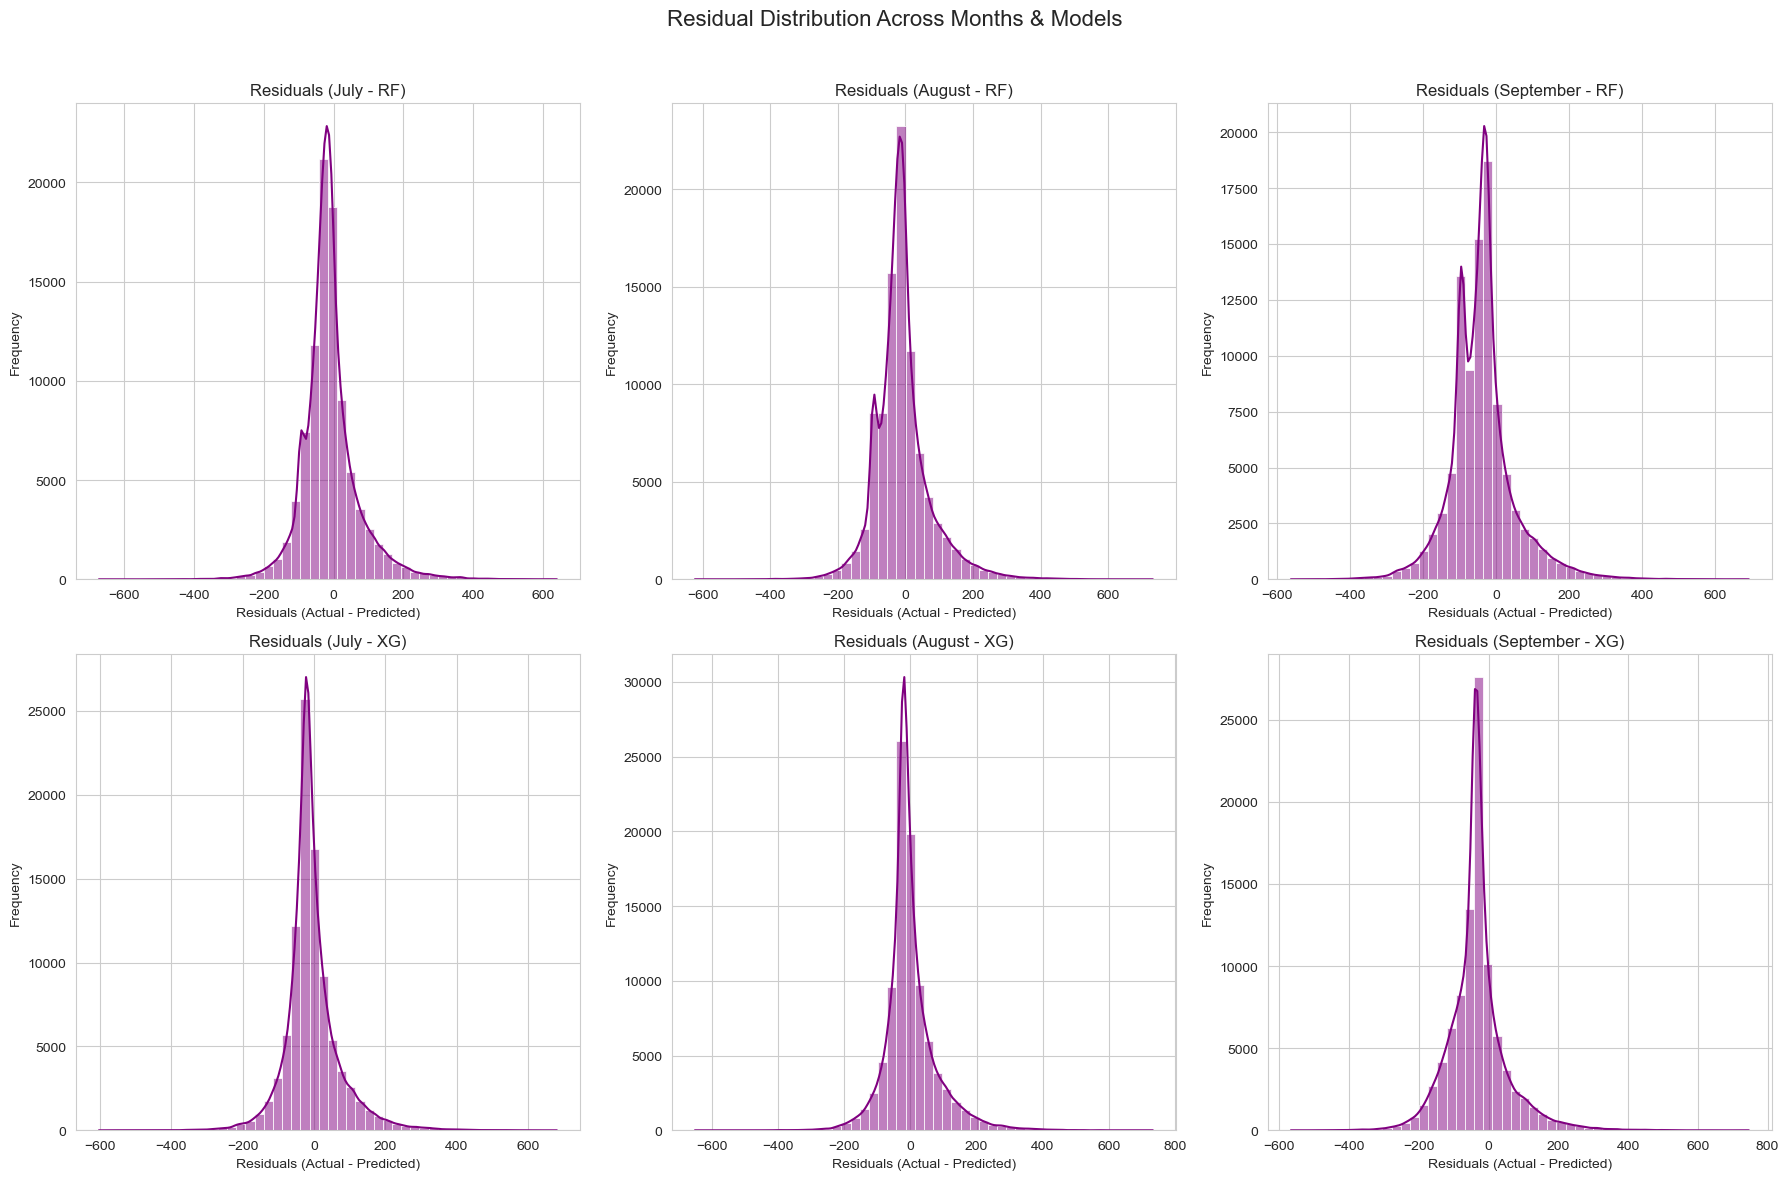

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to plot Residual Distribution
def plot_residual_distribution(actual_df, predicted_df, month, ax, model_type):
    """
    Plots the distribution of residuals (Actual - Predicted CLV) using a Seaborn KDE plot.

    Parameters:
    - actual_df: DataFrame containing actual values
    - predicted_df: DataFrame containing predictions
    - month: Month name as string (e.g., "July")
    - ax: Matplotlib axis for plotting
    - model_type: "RF" for Random Forest, "GB" for Gradient Boosting
    """

    actual_values = actual_df['avg_revenue_per_user']
    predicted_values = predicted_df[f"ARPU_{model_type}_Prediction"]

    # Compute Residuals
    residuals = actual_values - predicted_values

    # Plot Residual Distribution
    sns.histplot(residuals, bins=50, kde=True, color="purple", ax=ax)

    ax.set_title(f"Residuals ({month.capitalize()} - {model_type})", fontsize=12)
    ax.set_xlabel("Residuals (Actual - Predicted)", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(True)

# Create a 2x3 grid for residual plots (2 models x 3 months)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Residual Distribution Across Months & Models", fontsize=16)

# Define months and corresponding actual vs. predicted DataFrames
months = ["july", "august", "september"]
actual_dfs = [df_july, df_august, df_september]
predicted_dfs = [df_july_predictions, df_august_predictions, df_september_predictions]

# Loop through months and plot for both models
for i, (month, actual_df, predicted_df) in enumerate(zip(months, actual_dfs, predicted_dfs)):
    plot_residual_distribution(actual_df, predicted_df, month, axes[0, i], "RF")  # Random Forest
    plot_residual_distribution(actual_df, predicted_df, month, axes[1, i], "XG")  # Gradient Boosting

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [64]:
import pandas as pd

def calculate_large_residuals(actual_df, predicted_df, model_type, threshold=50):
    """
    Calculates the percentage of data points where the residual error falls outside the range [-50, 50].
    
    Parameters:
    - actual_df: DataFrame containing actual values
    - predicted_df: DataFrame containing predictions
    - model_type: "RF" for Random Forest, "XG" for Gradient Boosting
    - threshold: Residual error threshold (default: 50)
    
    Returns:
    - Percentage of data points exceeding the threshold range
    """
    actual_values = actual_df['avg_revenue_per_user']
    predicted_values = predicted_df[f"ARPU_{model_type}_Prediction"]
    
    # Compute Residuals
    residuals = actual_values - predicted_values
    
    # Calculate percentage outside the range [-threshold, threshold]
    percentage_exceeding = ((residuals < -threshold) | (residuals > threshold)).mean() * 100
    
    return percentage_exceeding

# Example usage:
months = ["july", "august", "september"]
actual_dfs = [df_july, df_august, df_september]
predicted_dfs = [df_july_predictions, df_august_predictions, df_september_predictions]

for month, actual_df, predicted_df in zip(months, actual_dfs, predicted_dfs):
    rf_error = calculate_large_residuals(actual_df, predicted_df, "RF")
    xg_error = calculate_large_residuals(actual_df, predicted_df, "XG")
    print(f"{month.capitalize()} - RF Model: {rf_error:.2f}% of data has residuals outside [-50, 50]")
    print(f"{month.capitalize()} - XG Model: {xg_error:.2f}% of data has residuals outside [-50, 50]")


July - RF Model: 40.08% of data has residuals outside [-50, 50]
July - XG Model: 34.84% of data has residuals outside [-50, 50]
August - RF Model: 42.16% of data has residuals outside [-50, 50]
August - XG Model: 34.84% of data has residuals outside [-50, 50]
September - RF Model: 54.90% of data has residuals outside [-50, 50]
September - XG Model: 46.35% of data has residuals outside [-50, 50]
